# Problem Statement -  Predict a price range of mobiles using other varibles

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv("Mobile_data.csv")

In [ ]:
df.sample(10)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
742,1822,1.2,0,8,0.2,195,6,0,172,910,2577,9,5,8,2
173,1577,0.5,0,42,0.3,197,5,4,1045,1737,2060,19,6,12,2
952,1444,2.1,9,38,0.4,104,7,16,624,917,3764,14,9,10,3
202,1087,1.3,0,16,0.3,166,3,9,295,589,690,14,6,6,0
1166,999,1.8,0,27,0.1,167,4,1,20,745,1344,17,10,5,0
482,1330,1.3,14,3,0.3,83,5,17,980,1262,463,14,6,11,0
6,1821,1.7,4,10,0.8,139,8,10,381,1018,3220,13,8,18,3
1188,732,2.3,7,39,0.6,188,7,11,1163,1554,3681,19,3,15,3
694,1310,1.4,0,33,0.4,105,1,14,806,1016,1301,13,12,19,1
555,1230,2.2,6,26,0.8,123,5,7,416,676,988,11,5,9,0


In [ ]:
df.shape

(2000, 15)

In [ ]:
df.describe(include='all')

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [ ]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [ ]:
for i in df.columns:
    print(i,'-',df[i].unique())

battery_power - [ 842 1021  563 ... 1139 1467  858]
clock_speed - [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
fc - [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
int_memory - [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep - [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt - [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 193 169 120 149 186 122 167]


## Data cleaning

In [ ]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

### No missing values 

In [ ]:
duplicates = df.duplicated()
duplicates.sum()

0

### No duplicates

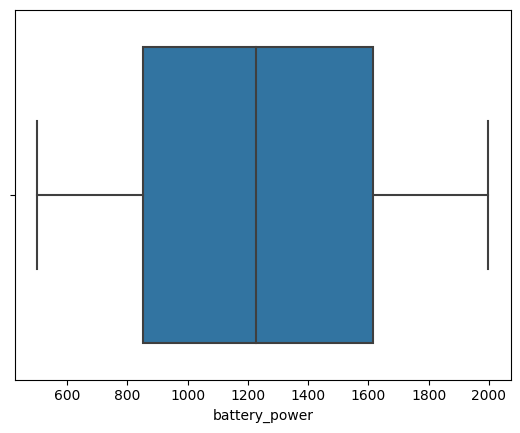

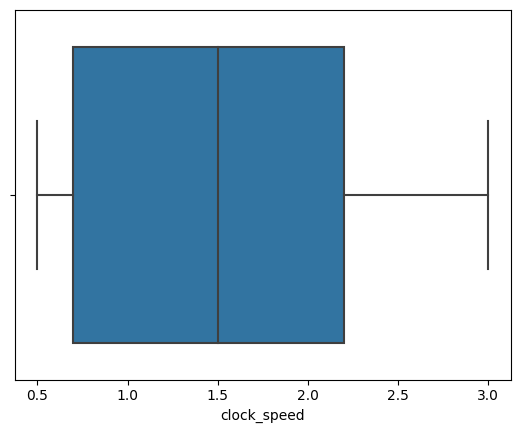

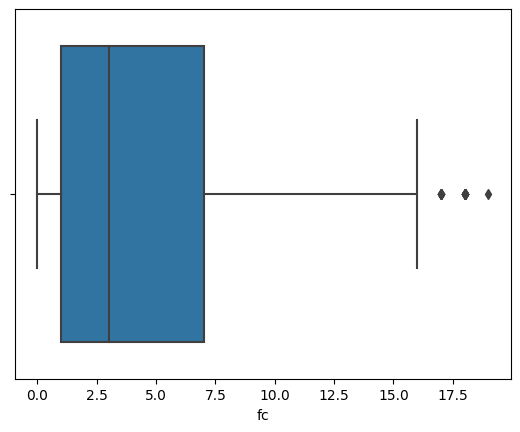

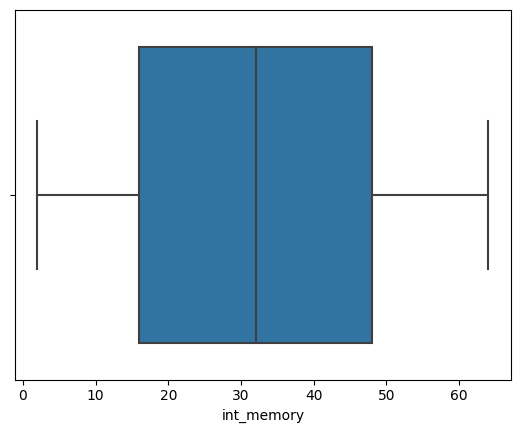

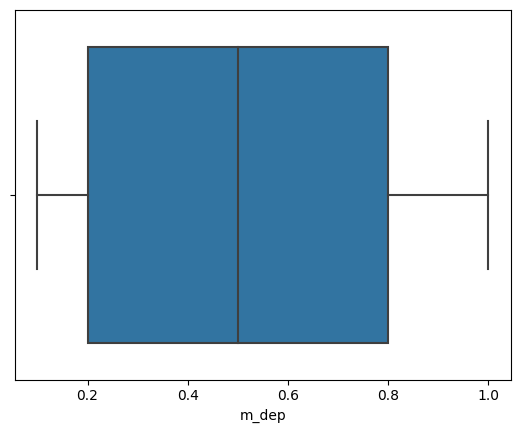

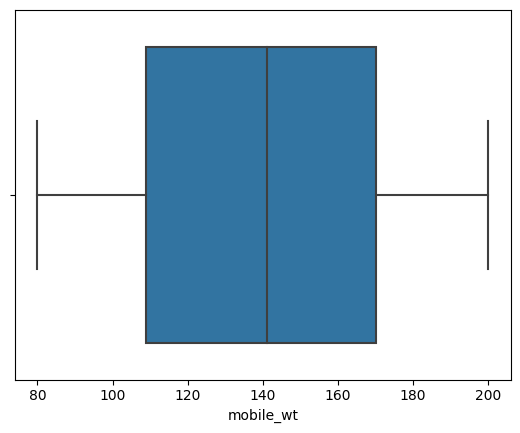

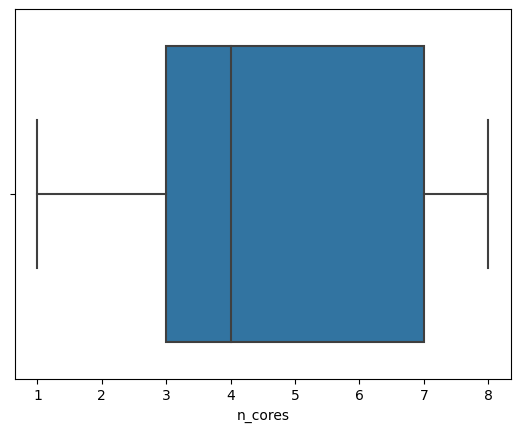

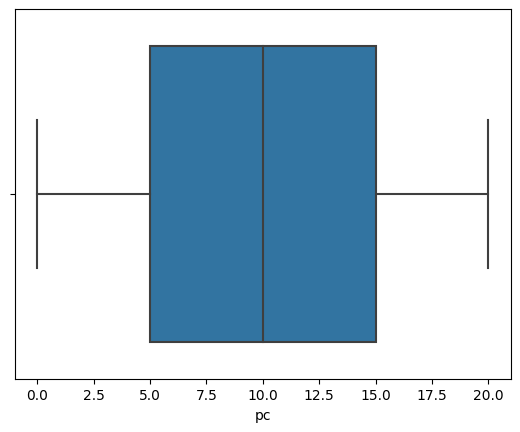

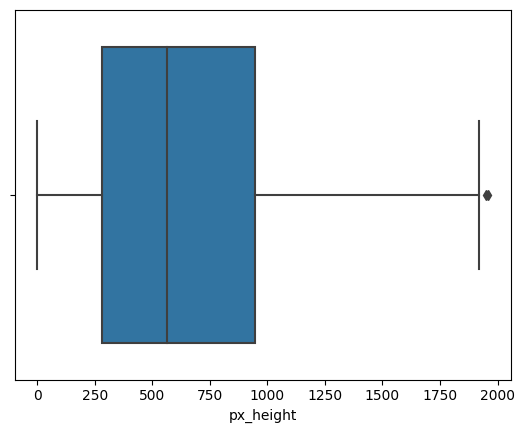

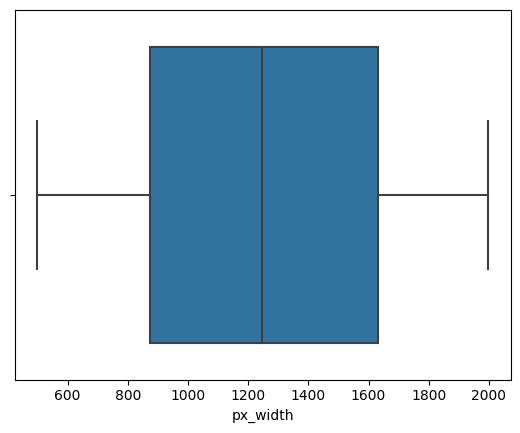

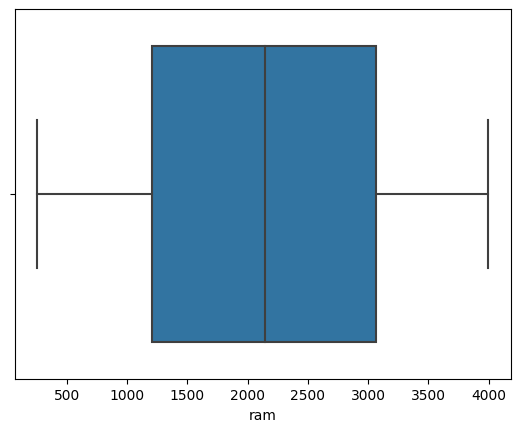

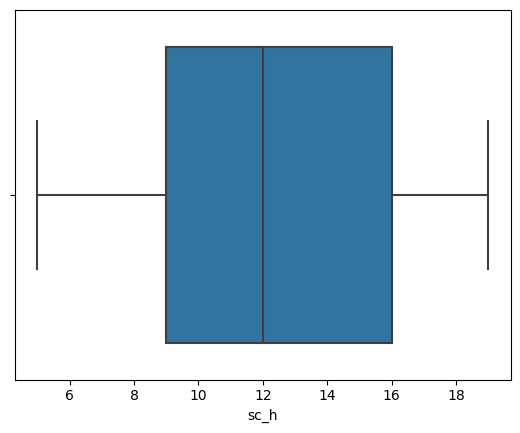

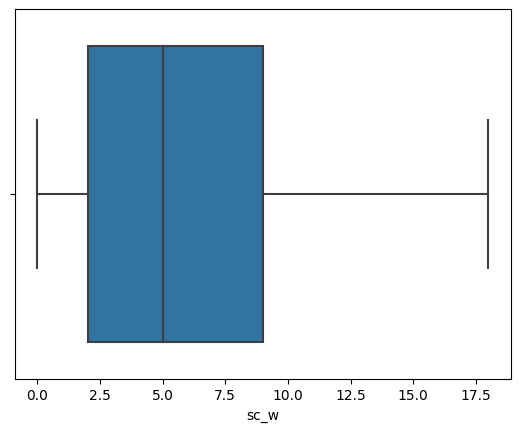

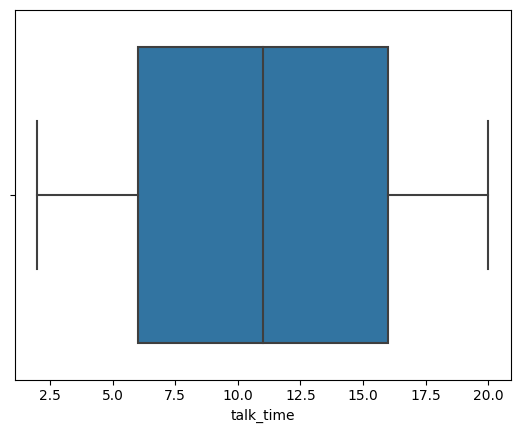

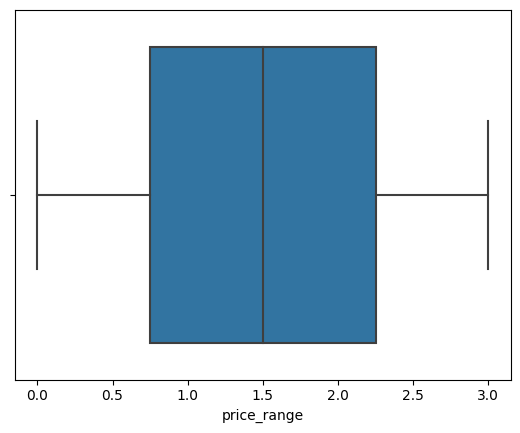

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.figure()

In [ ]:
def remove_outliers(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    low = q1-(1.5*IQR)
    high = q3+(1.5*IQR)
    return low,high

<Axes: xlabel='fc'>

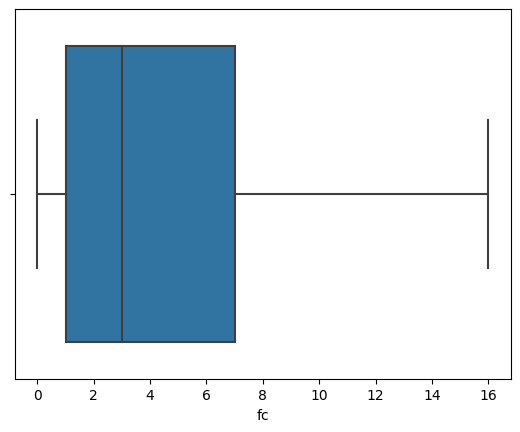

In [ ]:
low,high = remove_outliers(df['fc'])
df['fc'] = np.where(df['fc']<low,low,df['fc'])
df['fc'] = np.where(df['fc']>high,high,df['fc'])
sns.boxplot(df,x='fc')

<Axes: xlabel='px_height'>

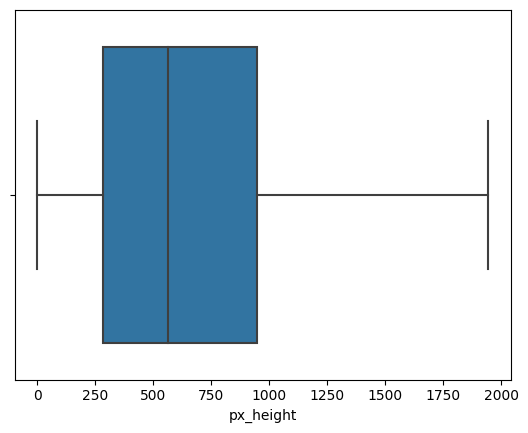

In [ ]:
low,high = remove_outliers(df['px_height'])
df['px_height'] = np.where(df['px_height']<low,low,df['px_height'])
df['px_height'] = np.where(df['px_height']>high,high,df['px_height'])
sns.boxplot(df,x='px_height')

In [ ]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

## Data Visualization

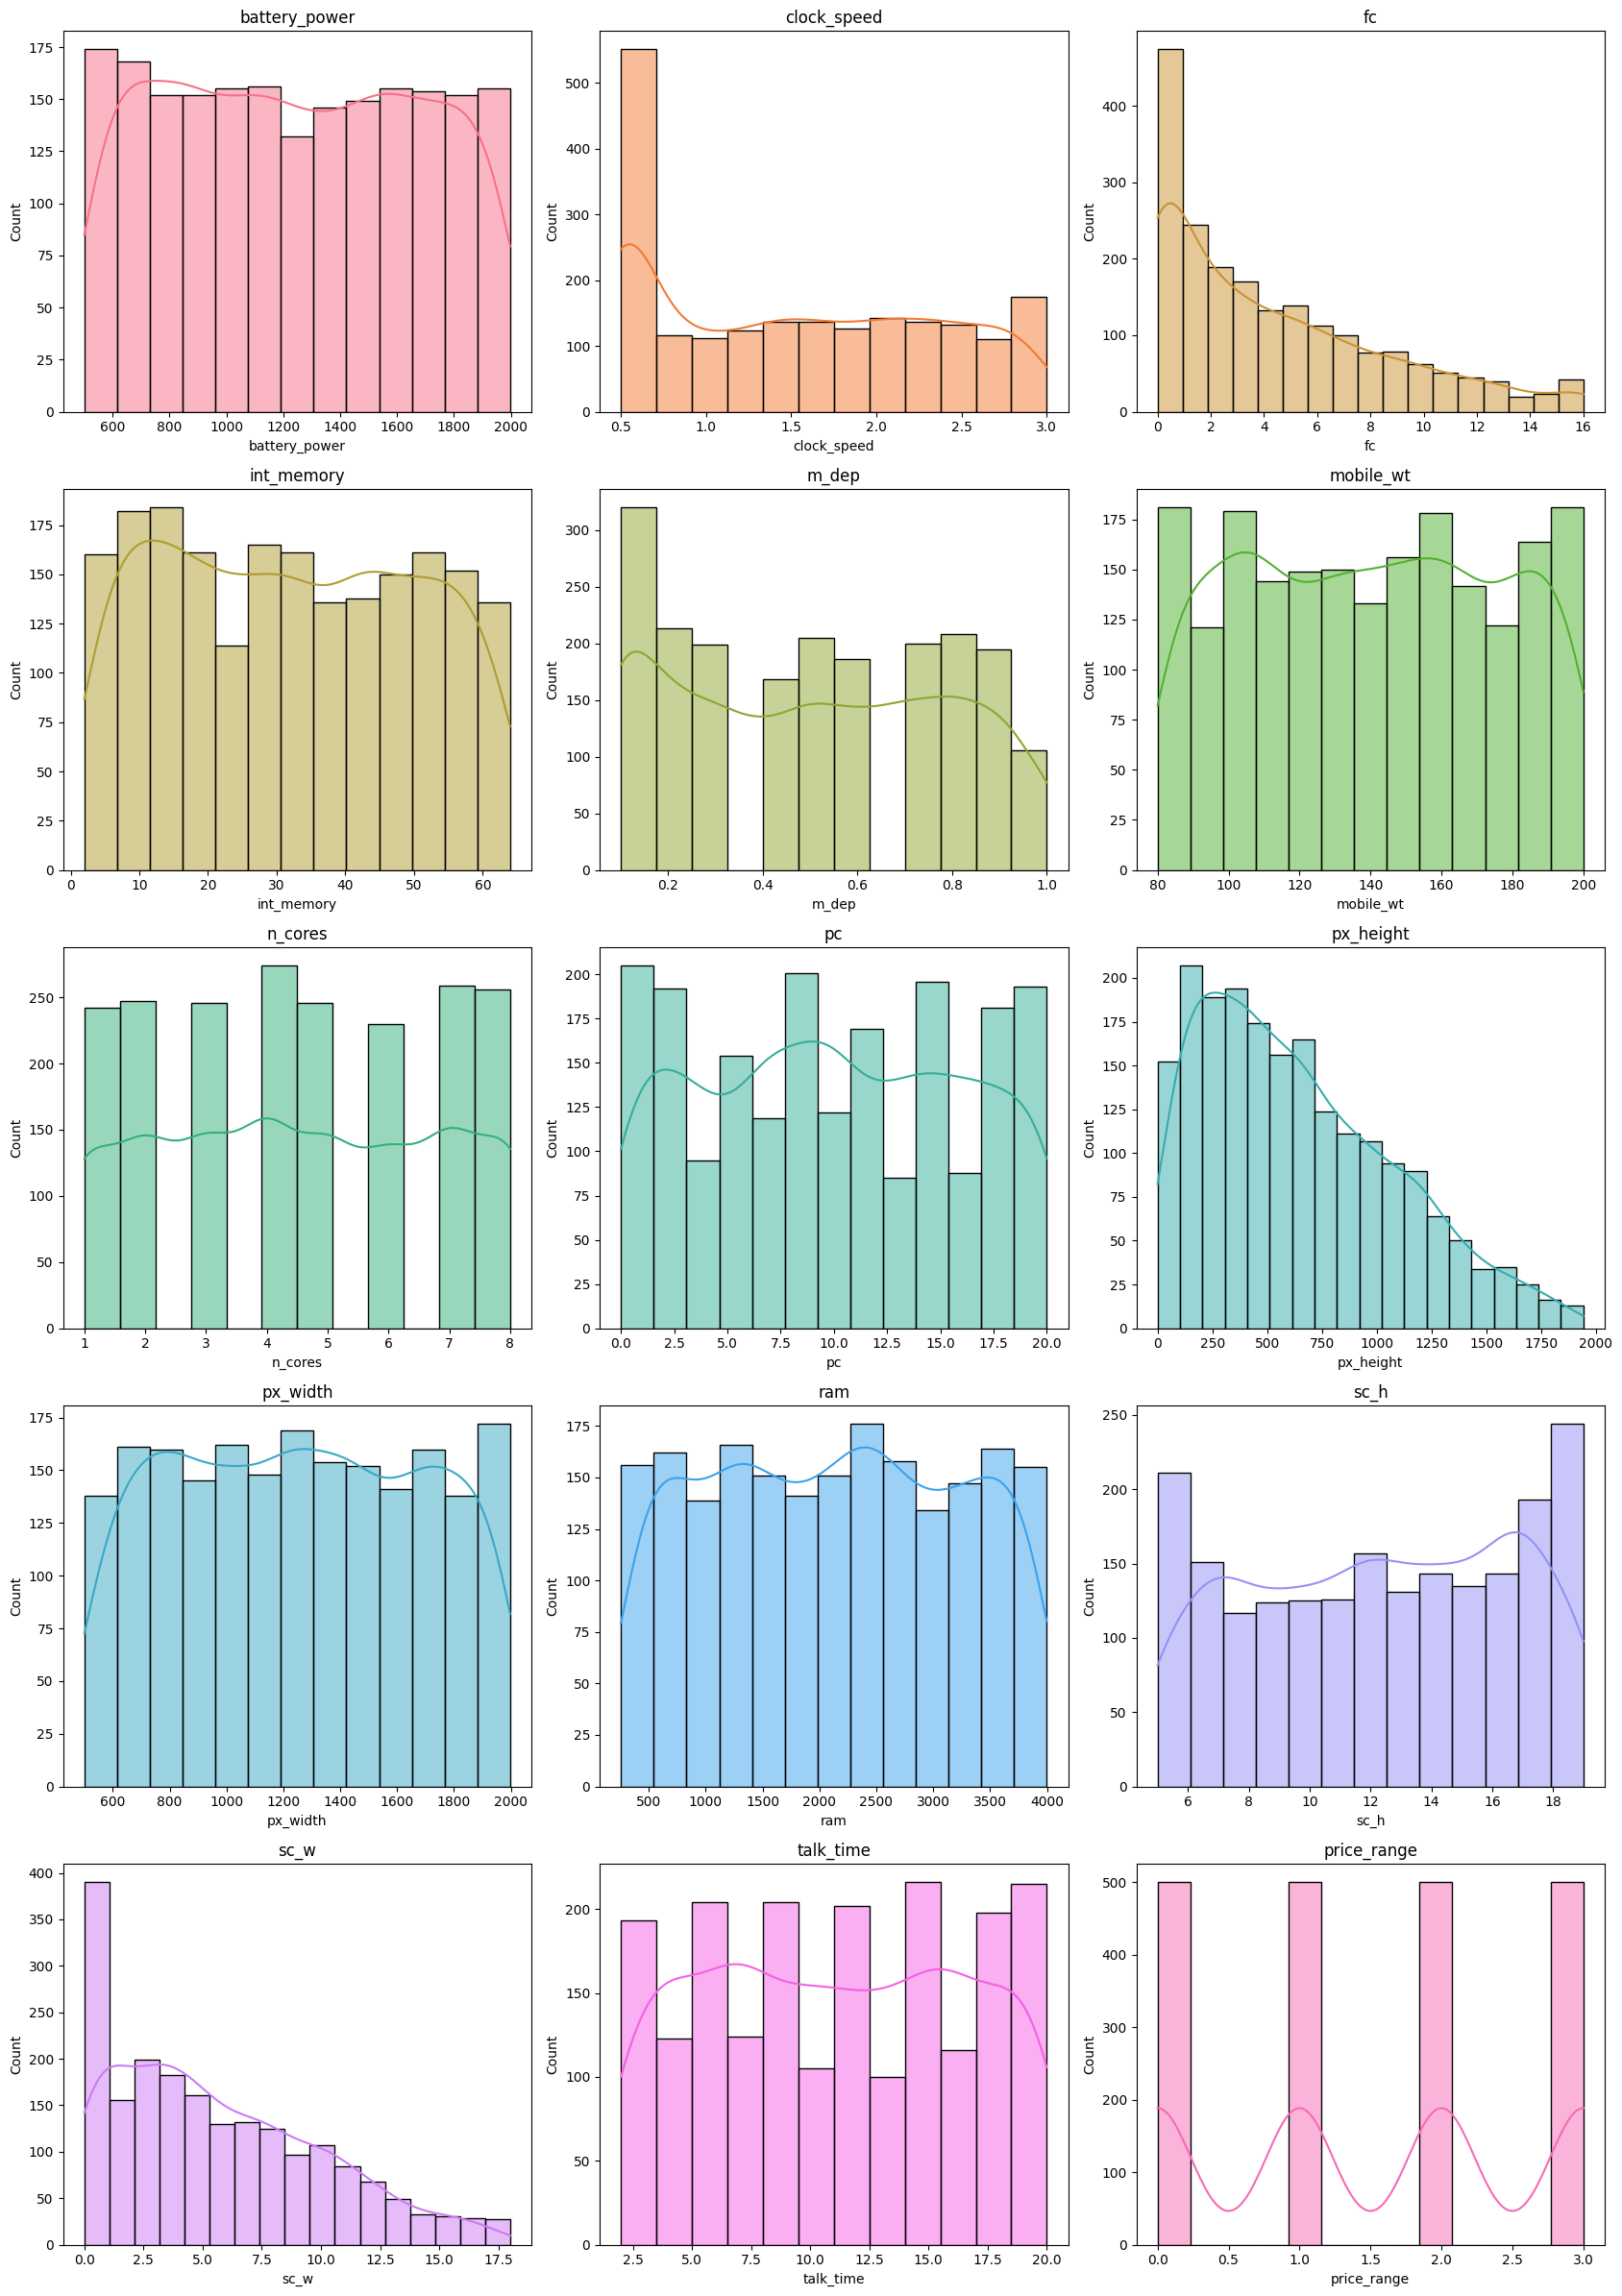

In [ ]:
num_columns = df.shape[1]
num_rows = 5
num_cols = (num_columns + num_rows - 1) // num_rows

# Define a list of colors
colors = sns.color_palette('husl', num_columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(17, 24))

for i, column in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df, x=column, kde=True, color=colors[i], line_kws={'color': 'black'}, ax=ax)
    ax.set_title(column)


# Remove empty subplots
if num_columns < num_rows * num_cols:
    for j in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

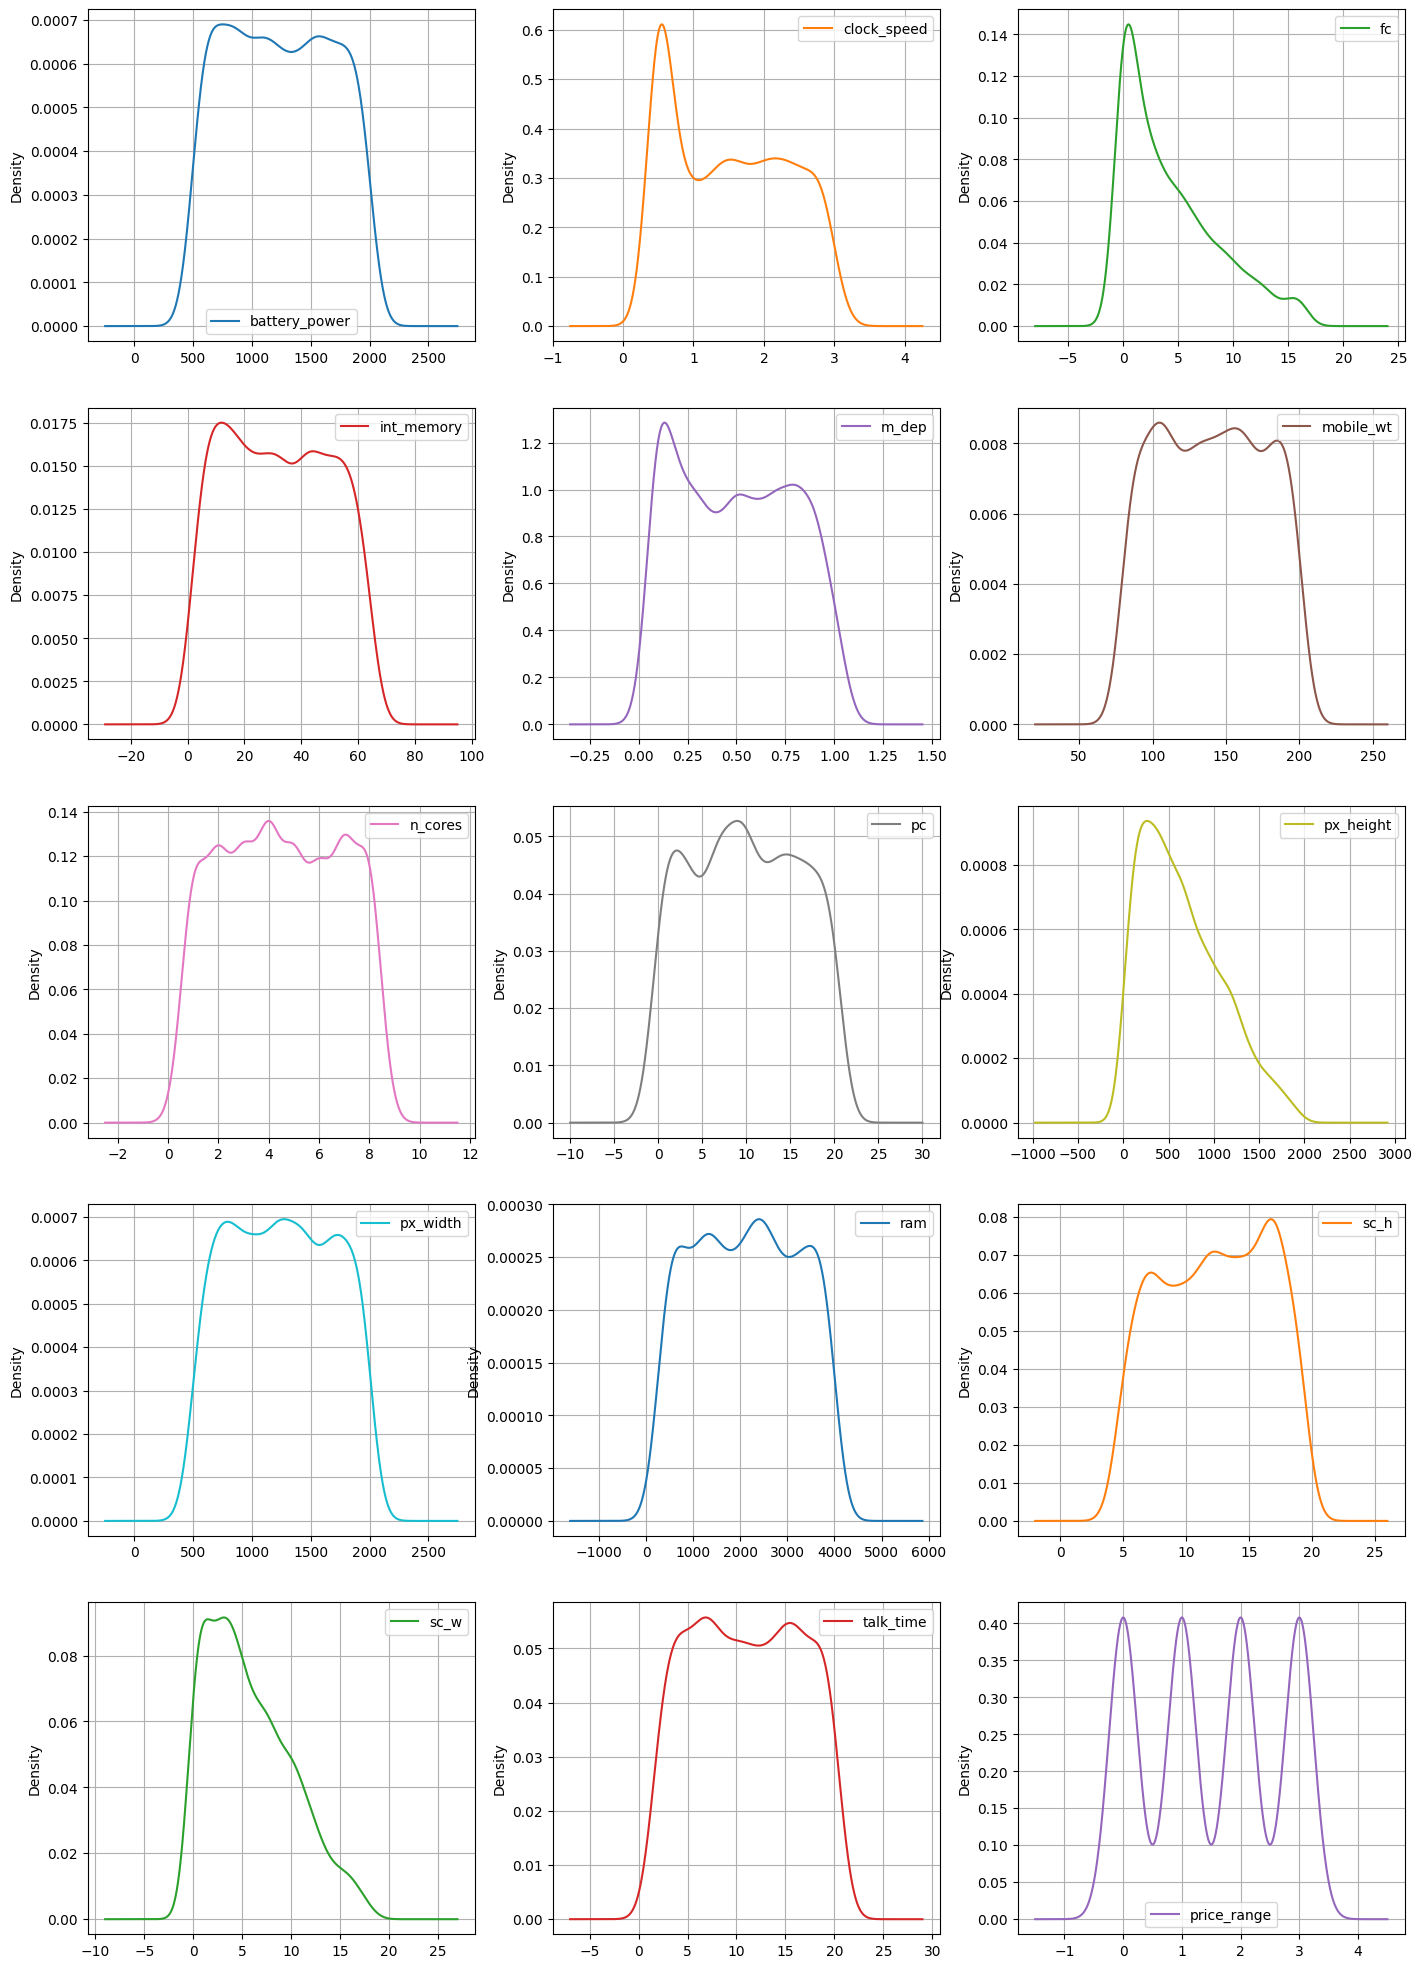

In [ ]:
colors = sns.color_palette("tab10")

df.plot(kind='density',subplots=True, layout=(5,3), sharex=False, sharey=False , figsize =(17,25) , color = colors, grid = True )

plt.show()

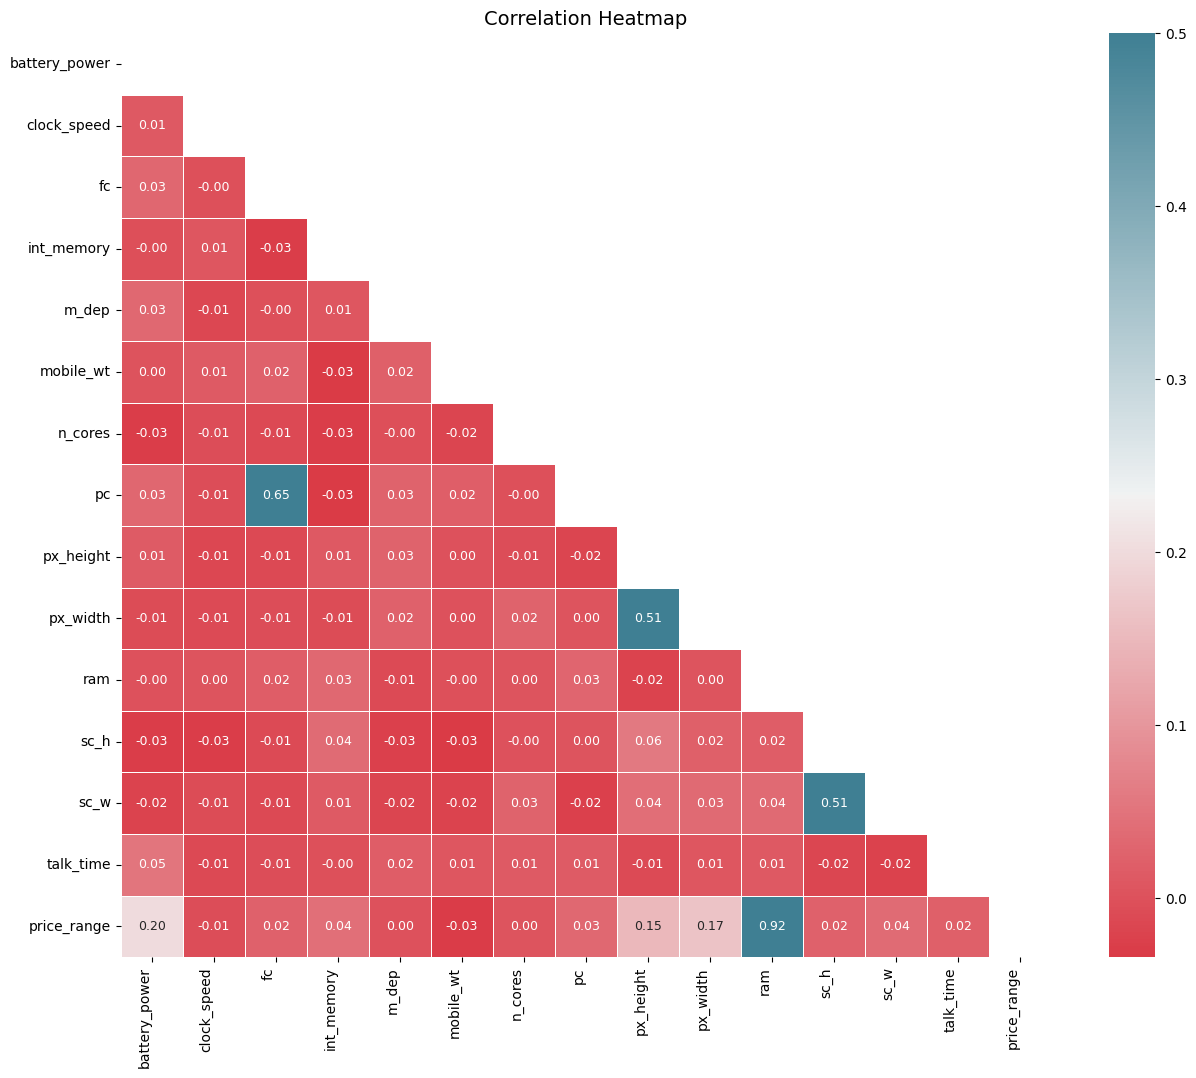

In [ ]:
plt.figure(figsize=(15, 12))  # Set the figure size
colormap = sns.diverging_palette(10, 220, as_cmap = True)

# Create a mask for the upper triangle
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap=colormap, annot=True, fmt=".2f", linewidths=0.5, vmax=0.5, annot_kws={'fontsize':9})
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.show()

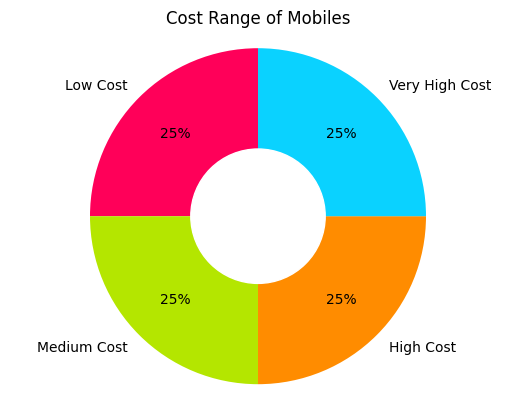

In [ ]:
freq = df['price_range'].value_counts()
counts = freq.to_list()
colors=["#ff0059","#b4e600","#ff8c00","#0ad2ff"]
plt.pie(x=counts,labels=['Low Cost','Medium Cost','High Cost','Very High Cost'],autopct='%1.0f%%',colors=colors,startangle=90, pctdistance=0.70)
circle = plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)
plt.axis('equal')
plt.title("Cost Range of Mobiles")
plt.show()

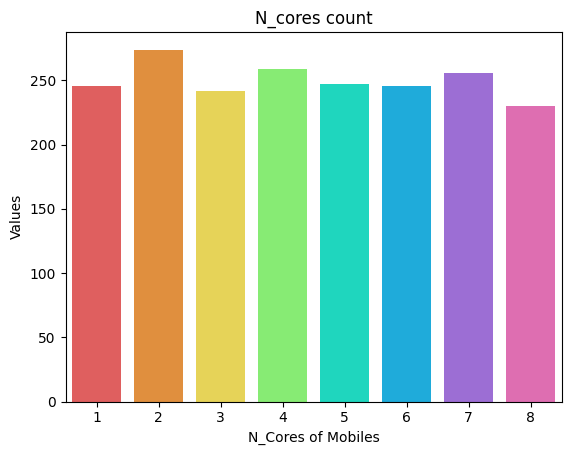

In [ ]:
colors=["#f44a4a","#fb8f23","#fee440","#7aff60","#00f5d4","#00bbf9","#9b5de5","#f15bb5"]
sns.barplot(x=df['n_cores'], y=df['n_cores'].value_counts(),palette=colors)
plt.xlabel('N_Cores of Mobiles')
plt.ylabel('Values')
plt.title('N_cores count')
plt.show()

## Standardization

In [ ]:
std = StandardScaler()
std

StandardScaler()

In [ ]:
df1=df.copy()
cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time']

for i in cols:
    df1[i] = std.fit_transform(df1[[i]])

In [ ]:
df1.sample(10)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
489,-0.228811,-0.517590,0.164379,0.879408,0.340740,-0.882969,-0.664768,0.673534,-0.928903,1.216142,-0.070277,-1.497202,-1.324131,1.279430,2
1261,0.736343,-1.253064,-0.766948,-0.664042,1.034357,0.897154,1.521249,0.013773,0.074165,0.982395,1.236363,0.876859,1.201522,-0.917331,3
163,-0.103614,-0.762748,1.561370,-0.333303,-0.006069,0.727618,-1.539175,1.663176,0.191377,1.105054,-1.464519,1.114266,1.890337,-1.283457,0
1073,-0.112719,0.953358,2.027033,-1.325520,-0.006069,1.631808,-0.664768,0.673534,-0.599806,-0.739463,-1.135323,-0.784983,0.053498,0.364113,0
1437,1.580852,1.566254,-0.766948,-0.884535,-0.006069,0.388547,-0.664768,-0.151168,-0.937919,0.512587,-1.186039,0.402047,-0.864922,1.279430,0
1709,1.555813,-1.253064,2.492697,0.548669,0.340740,0.360291,1.521249,1.003414,0.180107,1.459146,1.327652,-0.072765,-1.094526,1.096367,3
1519,0.219621,1.811412,-0.301284,1.540887,1.034357,1.123201,-1.101971,-0.975869,-1.267016,-1.602706,1.374680,-1.734608,-0.864922,-0.368140,3
140,1.171117,-1.253064,-0.999780,-0.057686,-1.393304,-0.176571,-1.539175,1.333295,2.129891,1.560977,-0.737890,1.114266,-1.324131,1.096367,2
1911,0.046622,-0.395011,-0.999780,-1.049904,-0.006069,-1.222041,-1.101971,-1.635631,1.273338,1.706779,-1.645254,1.114266,1.660732,-1.283457,0
1451,-1.610528,-1.253064,-0.999780,-1.105027,-0.006069,-0.543898,-0.227564,-1.140810,-1.097959,0.938423,0.190682,1.351672,1.431127,1.645557,1


## Model Building

In [ ]:
df1.shape

(2000, 15)

## Logistic Regression with scaling

In [ ]:
X1 = df1.drop('price_range',axis=1)
y1 = df1['price_range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.30,random_state=0)

In [ ]:
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model_1.score(X_train,y_train)

0.975

In [ ]:
model_1.score(X_test,y_test)

0.9666666666666667

In [ ]:
prediction = model_1.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

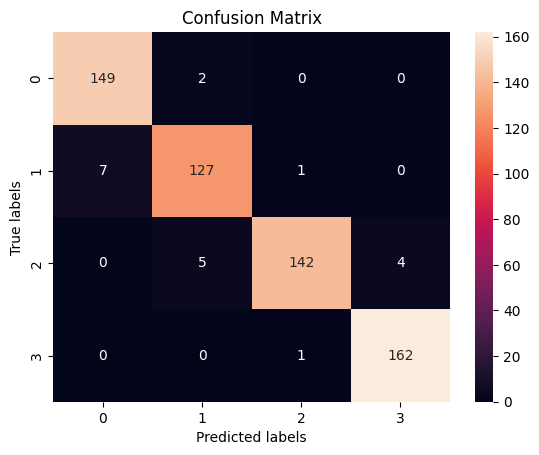

In [ ]:
cm = confusion_matrix(y_test, prediction)


sns.heatmap(cm, annot=True, fmt="d")


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')


In [ ]:
accuracy_score(y_test,prediction)

0.9666666666666667

In [ ]:
import pickle
pickle.dump(model_1, open('model.pkl', 'wb'))